In [1]:
%load_ext sql

# Connect  to Superstore Database

In [2]:
%sql sqlite:///superstore.db

# 1) Conditional Statements

Earlier in the course we used the `WHERE` clause to filter our data by some given criteria. But what if we wanted to keep *all* the records in our table and mark which ones meet the conditions? That's where the conditional logic comes in.

The tool we'll explore in this lesson for handling conditional logic in SQL queries is `CASE`. This expression allows us to perform data transformations, categorize information, and make decisions based on specific criteria.

`CASE` uses `WHEN` and `THEN` statements to specify conditions that must be met in order to classify a record into a particular group. After `WHEN`...`THEN`... conditions are defined, there's an `ELSE` condition that acts as a "catch-all" to classify any remaining records. Finally, we signal the end of the CASE expression with the END keyword.

We can create a new column in our SELECT clause using CASE to help classify records. For example, we could flag every row in `orders` where sales are greater than $75:

In [5]:
%%sql
SELECT order_id, sales, 
       CASE
       WHEN sales > 75 THEN 'Yes'
       ELSE 'No'
       END as sales_over_75
  FROM orders
  Limit 10;

 * sqlite:///superstore.db
Done.


order_id,sales,sales_over_75
CA-2016-152156,261.96,Yes
CA-2016-152156,731.94,Yes
CA-2016-138688,14.62,No
US-2015-108966,957.5775,Yes
US-2015-108966,22.368,No
CA-2014-115812,48.86,No
CA-2014-115812,7.28,No
CA-2014-115812,907.152,Yes
CA-2014-115812,18.504,No
CA-2014-115812,114.9,Yes


## Instructions

Two new leadership positions have been created at Superstore: Territory Supervisors, who each oversee two regions. 

Territory 1 consists of the Central and South regions, 

whereas Territory 2 is made up of the West and East regions. The new Territory Supervisors have requested sales information about their areas.

1. Write a query that includes `order_id`, `state`, `sales`, and a new column named `territory`.

1. For `territory`, use a `CASE` expression to categorize the 'Central' and 'South' regions from `region` as 'Territory 1' and the remaining regions as 'Territory 2'


In [6]:
%%sql
SELECT order_id,
        state,
        sales,
        CASE WHEN region = 'Central' OR region = 'South' THEN 'Territory 1'
        ELSE 'Territory 2'
        END AS Territory
from orders
limit 10;

 * sqlite:///superstore.db
Done.


order_id,state,sales,Territory
CA-2016-152156,Kentucky,261.96,Territory 1
CA-2016-152156,Kentucky,731.94,Territory 1
CA-2016-138688,California,14.62,Territory 2
US-2015-108966,Florida,957.5775,Territory 1
US-2015-108966,Florida,22.368,Territory 1
CA-2014-115812,California,48.86,Territory 2
CA-2014-115812,California,7.28,Territory 2
CA-2014-115812,California,907.152,Territory 2
CA-2014-115812,California,18.504,Territory 2
CA-2014-115812,California,114.9,Territory 2


# 2) Conditional Statements and Style

The type of operation known as "binning" quantifies into distinct groups and can also be done with the `CASE` expression in SQL. Instead of just writing one WHEN...THEN... statement, we can chain several together.

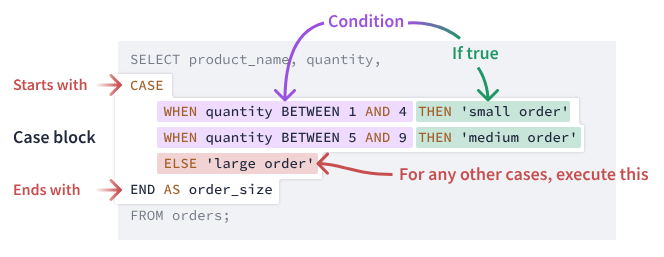

We can continue adding as many WHEN...THEN... statements as we need!

## Instructions

Your supervisor wants a way to see sales categorized into groups.

1. Return `order_id`, `product_id`, `sales`, and a binned column `sales_size` from orders that meets the following rules:
 * If the sale is between 0 and 49.99, it's a 'small sale.'
 
 * If it's between 50 and 99.99, it's a 'medium sale.'
 
 * If it's 100 or greater, it's a 'large sale.'

In [7]:
%%sql
SELECT order_id,
       product_id,
       sales,
       CASE
           WHEN sales BETWEEN 0 and 49.99 THEN 'small sale'
           WHEN sales BETWEEN 50 and 99.99 THEN 'medium sale'
           ELSE 'large sale'
       END as sales_size
FROM orders
limit 10;

 * sqlite:///superstore.db
Done.


order_id,product_id,sales,sales_size
CA-2016-152156,FUR-BO-10001798,261.96,large sale
CA-2016-152156,FUR-CH-10000454,731.94,large sale
CA-2016-138688,OFF-LA-10000240,14.62,small sale
US-2015-108966,FUR-TA-10000577,957.5775,large sale
US-2015-108966,OFF-ST-10000760,22.368,small sale
CA-2014-115812,FUR-FU-10001487,48.86,small sale
CA-2014-115812,OFF-AR-10002833,7.28,small sale
CA-2014-115812,TEC-PH-10002275,907.152,large sale
CA-2014-115812,OFF-BI-10003910,18.504,small sale
CA-2014-115812,OFF-AP-10002892,114.9,large sale


# 3) Grouping Categorical Values with CASE

`CASE` statements can also be helpful to use with text fields, particularly for collecting a series of values into an "*other*" category.

The region field contains four unique values:

* South

* West

* Central

* East

In this example, we want to keep the `West` and `East` regions intact, but want to bundle `South` and `Central` into one group called 'Other.'

In [8]:
%%sql
SELECT DISTINCT city, state, region,
       CASE
       WHEN region = 'West' THEN 'West'
       WHEN region = 'East' THEN 'East' 
       ELSE 'Other'
       END AS region_regroup
  FROM orders
  limit 10;

 * sqlite:///superstore.db
Done.


city,state,region,region_regroup
Henderson,Kentucky,South,Other
Los Angeles,California,West,West
Fort Lauderdale,Florida,South,Other
Concord,North Carolina,South,Other
Seattle,Washington,West,West
Fort Worth,Texas,Central,Other
Madison,Wisconsin,Central,Other
West Jordan,Utah,West,West
San Francisco,California,West,West
Fremont,Nebraska,Central,Other


## Instructions

Superstore wants to improve the efficiency of their shipping process. You've been asked to help with this by writing a query that creates a *shipping prioritization field*.

1. Write a query that includes `order_date`, `order_id`, `ship_mode`, and a grouped field aliased as `ship_priority`.

1. Assign shipping priority based on ship mode:

 * If `ship_mode` is 'Same Day', assign 'High Priority.'
 
 * If `ship_mode` is 'First Class', assign 'Medium Priority.'

 * Everything else should be assigned 'Low Priority.'

1. Order your results to show the most recent orders first.


In [9]:
%%sql
SELECT order_date,
       order_id,
       ship_mode,
       CASE
       WHEN ship_mode = 'Same Day' then 'High Priority'
       WHEN ship_mode = 'First Class' then 'Medium Priority'
       ELSE 'Low Priority'
       END as 'ship_priority'
       
from orders
ORDER BY order_date DESC
limit 10;

 * sqlite:///superstore.db
Done.


order_date,order_id,ship_mode,ship_priority
2017-12-30,CA-2017-126221,Standard Class,Low Priority
2017-12-30,CA-2017-143259,Standard Class,Low Priority
2017-12-30,CA-2017-143259,Standard Class,Low Priority
2017-12-30,CA-2017-143259,Standard Class,Low Priority
2017-12-30,CA-2017-115427,Standard Class,Low Priority
2017-12-30,CA-2017-115427,Standard Class,Low Priority
2017-12-30,CA-2017-156720,Standard Class,Low Priority
2017-12-29,CA-2017-118885,Standard Class,Low Priority
2017-12-29,CA-2017-118885,Standard Class,Low Priority
2017-12-29,US-2017-102638,First Class,Medium Priority


# 4 Not Accounting for ELSE

Let's continue from the previous example of regrouping regions. Below is the same query from the previous screen, but without the `ELSE` condition in the `CASE` statement. Let's see what the results look like.

In [11]:
%%sql
SELECT DISTINCT city, state, region,
       CASE
       WHEN region = 'West' THEN 'West'
       WHEN region = 'East' THEN 'East' 
       END AS region_regroup
  FROM orders
  limit 10;

 * sqlite:///superstore.db
Done.


city,state,region,region_regroup
Henderson,Kentucky,South,None
Los Angeles,California,West,West
Fort Lauderdale,Florida,South,None
Concord,North Carolina,South,None
Seattle,Washington,West,West
Fort Worth,Texas,Central,None
Madison,Wisconsin,Central,None
West Jordan,Utah,West,West
San Francisco,California,West,West
Fremont,Nebraska,Central,None


As we can see in the table, the query returns a missing value for the instances where `region` doesn't meet one of the conditions in the `CASE` statement.

We just uncovered the following behavior: for values not captured by a `CASE` expression, SQL will leave them as missing values.

## Instructions

The manager of Superstore Los Angeles is concerned about the Supplies subcategory because of low performance. They want you to provide data that groups profit margin (profit/sales) into "Great" and "Terrible," and they don't care about the labels in between.

1. Write a query that includes `order_id`, `product_name`, a new field called `profit_margin` calculated by profit/sales, and a `CASE` expression aliased as `profit_category`.

1. Your `CASE` expression should create the following groups:

   * If profit margin is greater than 0.3, assign the result as 'Great'.
   
   *  If profit margin is less than 0.1, assign the result 'Terrible'.
   
   *  The remaining values should not be assigned a result (but should still appear in the query's output).

1. Make sure your results only include the 'Supplies' subcategory for the city of 'Los Angeles.'

1. Order your results by `profit_category` in descending order.

Note that in your `CASE` statement, you'll have to use the raw calculation for profit margin instead of the alias, and ensure that all your aliases are not in string format.

In [12]:
%%sql
SELECT order_id,
       product_name,
       profit/sales as profit_margin,
       CASE
       WHEN profit/sales > 0.3 THEN 'Great'
       WHEN profit/sales < 0.1 THEN 'Terrible'
       END AS profit_category
 FROM orders
 WHERE subcategory = 'Supplies'
 AND  city= 'Los Angeles'
 ORDER BY profit_category DESC 
 limit 10;

 * sqlite:///superstore.db
Done.


order_id,product_name,profit_margin,profit_category
CA-2015-132906,Martin-Yale Premier Letter Opener,0.03,Terrible
CA-2016-145919,Premier Electric Letter Opener,0.05,Terrible
CA-2014-101931,Serrated Blade or Curved Handle Hand Letter Openers,0.010000000000000031,Terrible
CA-2014-101931,Premier Automatic Letter Opener,0.03,Terrible
CA-2015-110870,Staple remover,0.01999999999999996,Terrible
CA-2016-144015,Premier Electric Letter Opener,0.05,Terrible
CA-2015-167745,"Elite 5"" Scissors",0.30000000000000004,Great
CA-2016-161669,Acme Preferred Stainless Steel Scissors,0.29000000000000004,None
CA-2014-146528,Acme Kleen Earth Office Shears,0.29,None
CA-2016-129868,Fiskars Home & Office Scissors,0.27999999999999997,None


# 5) Order by Expressions

Let's continue our investigation of shipping prioritization. Instead of creating new labels in a column named `ship_priority`, what if we just wanted to display "Same Day" shipping first, followed by "First Class," and then everything else? We can't rely on a statement like `ORDER BY ship_mode` because alphabetically "First Class" would come before "Same Day." 

Instead, we can create a `CASE` expression that assigns a numeric "rank" to each value:

In [15]:
%%sql
SELECT order_date, order_id, ship_mode,
       CASE
       WHEN ship_mode = 'Same Day' THEN 1
       WHEN ship_mode = 'First Class' THEN 2
       ELSE 3
       END AS ship_priority
  FROM orders
 ORDER BY ship_priority
 limit 5;

 * sqlite:///superstore.db
Done.


order_date,order_id,ship_mode,ship_priority
2016-10-21,CA-2016-155516,Same Day,1
2016-10-21,CA-2016-155516,Same Day,1
2016-10-21,CA-2016-155516,Same Day,1
2016-10-21,CA-2016-155516,Same Day,1
2016-09-19,US-2016-156097,Same Day,1


We can see from our sample output, that the highest priority shipping mode, Same Day, appears at the top of the list because we assigned it a "rank" of 1.

But what if we don't want to show the ranking column?

We can get rid of the ordering expressions from `SELECT` (this is mostly aesthetic, since we already got the relevant data above). But we can't just do that because then `ORDER BY` wouldn't know what ship_priority is. So we transfer the `CASE` expression to the `ORDER BY` clause, like this:

In [16]:
%%sql

SELECT order_date, order_id, ship_mode
  FROM orders
 ORDER BY CASE
       WHEN ship_mode = 'Same Day' THEN 1
       WHEN ship_mode = 'First Class' THEN 2
       ELSE 3
       END
limit 5;

 * sqlite:///superstore.db
Done.


order_date,order_id,ship_mode
2016-10-21,CA-2016-155516,Same Day
2016-10-21,CA-2016-155516,Same Day
2016-10-21,CA-2016-155516,Same Day
2016-10-21,CA-2016-155516,Same Day
2016-09-19,US-2016-156097,Same Day


## Instructions

The manager of Superstore Watertown in New York noticed that the **Corporate segment** is the most profitable, followed by the **Consumer segment**. They want you to write a query with the most profitable segments on top so they can learn more about the products these segments purchase.

1. Write a query that includes:
`segment
subcategory
product_name
sales
profit`


1. Limit your results to just the city of Watertown. (There is only one city in the database with this name.)

1. Order your results so that the Corporate segment appears first, then the Consumer segment, followed by any remaining segments.

In [17]:
%%sql

SELECT segment,
       subcategory,
       product_name,
       sales,
       profit
  FROM orders
  WHERE city = 'Watertown'
  ORDER BY CASE
           WHEN segment = 'Corporate' THEN 1
           WHEN segment = 'Consumer' THEN 2
           ELSE 3
           END


 * sqlite:///superstore.db
Done.


segment,subcategory,product_name,sales,profit
Corporate,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Custom Colors",1573.488,196.686
Corporate,Binders,GBC DocuBind TL200 Manual Binding Machine,895.92,302.373
Corporate,Chairs,Global Commerce Series Low-Back Swivel/Tilt Chairs,462.564,97.6523999999999
Corporate,Appliances,Staple holder,35.91,9.6957
Corporate,Storage,"Letter/Legal File Tote with Clear Snap-On Lid, Black Granite",96.36,25.0536
Consumer,Appliances,"Holmes Cool Mist Humidifier for the Whole House with 8-Gallon Output per Day, Extended Life Filter",19.9,8.955
Consumer,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contemporary Contour Shape Chair Mats",70.71,4.94969999999999
Consumer,Paper,"Wirebound Message Books, Four 2 3/4"" x 5"" Forms per Page, 600 Sets per Book",18.54,8.7138
Consumer,Binders,Fellowes PB200 Plastic Comb Binding Machine,679.96,220.987
Home Office,Chairs,"Situations Contoured Folding Chairs, 4/Set",191.646,31.941


# 6) Writing Performant SQL

To end our Introduction to SQL course, let's talk about one more SQL "best practice." SQL databases can easily contain millions of records. In a fast-paced business world, we want to be able to pull data in a timely manner.

SQL queries are known as  

> "performant" when they accelerate the performance of your queries.

There are many ways to make your queries performant, which can get quite complicated. Here are a few related to this course:

1. Avoid `SELECT *`. Only select the columns you need from the query.

1. Select a sample of rows with `LIMIT`. This could limit the need to print millions of records.

1. Use `IN` instead of `OR`. `IN` will evaluate your conditions at once rather than individually.
